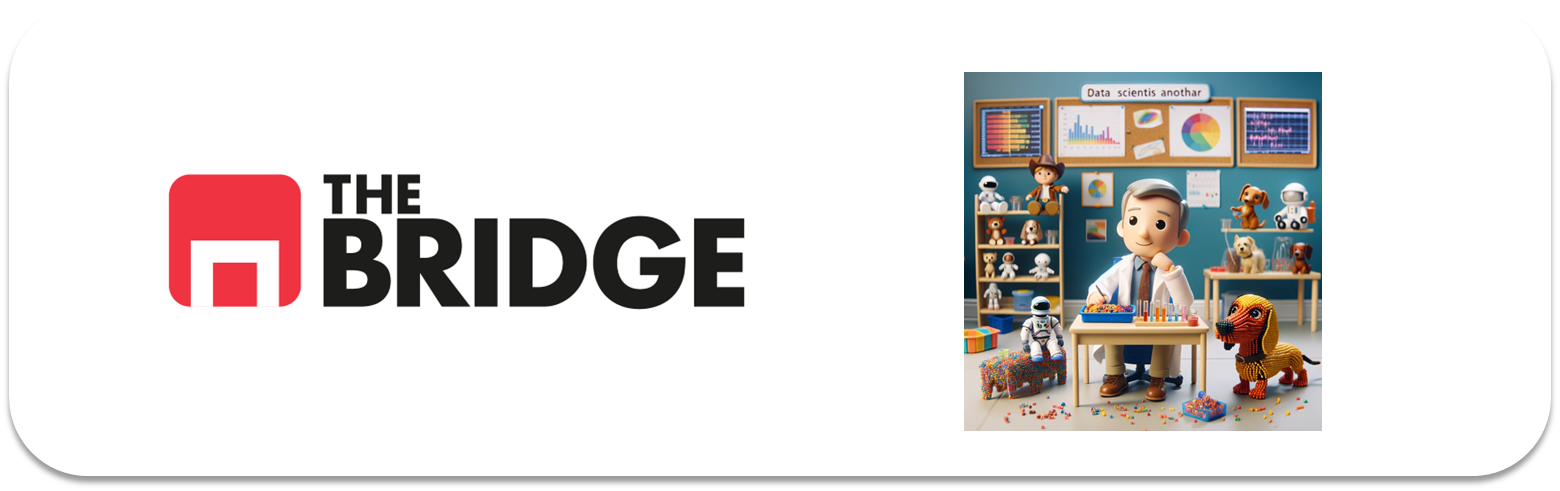

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [2]:
dataset_names = sns.get_dataset_names()
print(dataset_names)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
# Cargar el dataset del Titanic en un DataFrame
df_titanic = sns.load_dataset('titanic')

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [4]:
# Mostrar una porción del dataset
print("Porción del dataset:")
df_titanic.head()

Porción del dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# Verificar si hay valores nulos
print("\nValores nulos en el dataset:")
df_titanic.isnull().sum()


Valores nulos en el dataset:


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [7]:
# Calcular el porcentaje de valores nulos en cada columna
porcentaje_nulos = (df_titanic.isnull().sum() / len(df_titanic)) * 100
print("Porcentaje de valores nulos en cada columna:")
print(porcentaje_nulos)

Porcentaje de valores nulos en cada columna:
survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


In [10]:
# Crear una copia del DataFrame df_titanic
df_titanic_copia = df_titanic.copy()

# Verificar que la copia se ha creado correctamente
print("Encabezado del DataFrame copiado:")
df_titanic_copia.head()

Encabezado del DataFrame copiado:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
# Para la columna 'age', reemplazar los valores nulos por la mediana
df_titanic_copia['age'] = df_titanic_copia['age'].fillna(df_titanic_copia['age'].median())


In [12]:
# Para 'deck' como tiene muchos valores nulos, podríamos eliminar la columna
df_titanic_copia.drop(columns=['deck'], inplace=True)

In [13]:
# Para 'embarked' y 'embark_town', podríamos eliminar las filas que contienen valores nulos
df_titanic_copia.dropna(subset=['embarked', 'embark_town'], inplace=True)

In [14]:
# Eliminar la columna 'parch'
df_titanic_copia.drop(columns=['parch'], inplace=True)

In [15]:
# Verificar que no hay valores nulos después del procesamiento
df_titanic_copia.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [16]:
df_titanic_copia.head()


,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,Southampton,no,True


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| -       | - |





| Columna/Variable | Descripción |
| ---------------- | ----------- |
| survived         | Indica si el pasajero sobrevivió (1) o no (0) |
| pclass           | Clase socioeconómica del pasajero (1 = Clase alta, 2 = Clase media, 3 = Clase baja) |
| sex              | Género del pasajero (male = masculino, female = femenino) |
| age              | Edad del pasajero (en años) |
| sibsp            | Número de hermanos/cónyuges a bordo del Titanic |
| fare             | Tarifa pagada por el pasajero |
| embarked         | Puerto de embarque del pasajero (C = Cherbourg, Q = Queenstown, S = Southampton) |
| class            | Clase del pasajero (similar a pclass pero con formato de texto) |
| who              | Categoría de la persona (man = hombre, woman = mujer, child = niño) |
| adult_male | Indica si la persona es un adulto masculino (True) o no (False) |
| embark_town | Ciudad donde embarcó el pasajero (Cherbourg, Queenstown, Southampton) |
| alive | Estado de supervivencia del pasajero (yes = sí, no = no) |
| alone | Indica si el pasajero viajaba solo (True) o acompañado (False) |



### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [21]:
# Buscar las tres ciudades que visitó el Titanic antes de poner rumbo a su destino
ciudades_originales = df_titanic_copia['embarked'].unique()
print("Ciudades originales:", ciudades_originales)

# Reemplazar las iniciales por los nombres completos de las ciudades
df_titanic_copia['embarked'].replace({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}, inplace=True)

# Verificar que se hayan cambiado las iniciales por los nombres completos de las ciudades
ciudades_actualizadas = df_titanic_copia['embarked'].unique()
print("Ciudades actualizadas:", ciudades_actualizadas)




Ciudades originales: ['Southampton' 'Cherbourg' 'Queenstown']
Ciudades actualizadas: ['Southampton' 'Cherbourg' 'Queenstown']


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

### Variables Categóricas:

1. **survived**:
   - Indica si el pasajero sobrevivió (1) o no (0).
   
2. **who**:
   - Categoría de la persona (man = hombre, woman = mujer, child = niño).
   
3. **class**:
   - Clase del pasajero (1 = Clase alta, 2 = Clase media, 3 = Clase baja).
   
4. **embarked**:
   - Puerto de embarque del pasajero (C = Cherbourg, Q = Queenstown, S = Southampton).
   
5. **alone**:
   - Indica si el pasajero viajaba solo (True) o acompañado (False).
   
### Variables Numéricas:

1. **age**:
   - Edad del pasajero.
   
2. **fare**:
   - Tarifa pagada por el pasajero.


### #2.1 Categóricas

### survived:

**Valores:**
- 0: No sobrevivió.
- 1: Sobrevivió.

**Gráfica:**
Histograma de frecuencia de sobrevivientes vs no sobrevivientes.

**Conclusiones/observaciones:**
- Se observa que hay más pasajeros que no sobrevivieron que aquellos que sí lo hicieron.
- La mayoría de los pasajeros no sobrevivió al naufragio del Titanic.

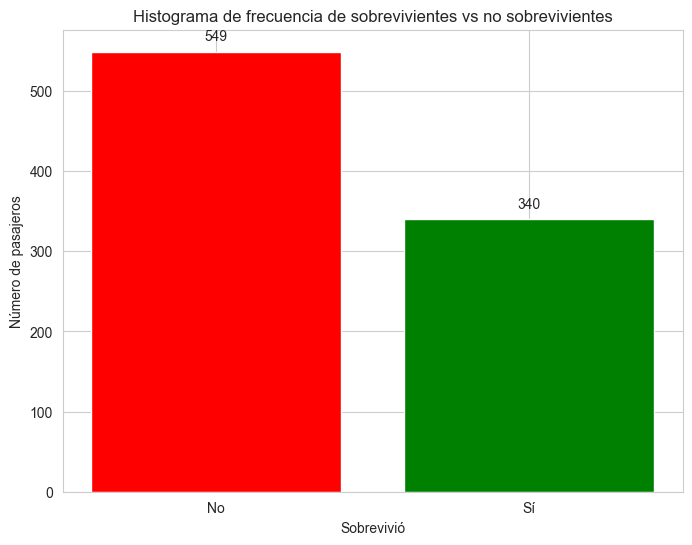

In [26]:
import matplotlib.pyplot as plt

# Obtener la frecuencia de sobrevivientes y no sobrevivientes
frecuencia_sobrevivientes = df_titanic_copia['survived'].value_counts()

# Crear la figura y los ejes
plt.figure(figsize=(8, 6))

# Crear el histograma de frecuencia de sobrevivientes vs no sobrevivientes
plt.bar(frecuencia_sobrevivientes.index, frecuencia_sobrevivientes.values, color=['red', 'green'])

# Etiquetas de los ejes y título
plt.xlabel('Sobrevivió')
plt.ylabel('Número de pasajeros')
plt.title('Histograma de frecuencia de sobrevivientes vs no sobrevivientes')

# Agregar etiquetas a las barras
for index, value in enumerate(frecuencia_sobrevivientes.values):
    plt.text(index, value + 10, str(value), ha='center', va='bottom')

# Mostrar el histograma
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()


### who:

**Valores:**
- man: Hombre.
- woman: Mujer.
- child: Niño.

**Gráfica:**
Gráfico de barras de la distribución de hombres, mujeres y niños.

**Conclusiones/observaciones:**
- Aunque la mayoría de los pasajeros eran hombres adultos sobrevivieron más mujeres que hombres.
- Hay una proporción mayor de supervivientes en mujeres y niños en comparación con los hombres.


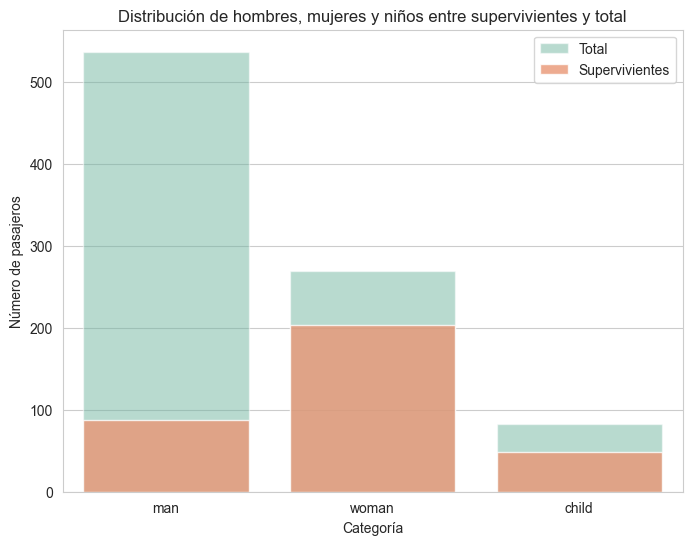

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo y los colores de Seaborn
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Obtener la frecuencia de cada categoría en la variable 'who' para todos los pasajeros
frecuencia_who_total = df_titanic_copia['who'].value_counts()

# Obtener la frecuencia de cada categoría en la variable 'who' para los pasajeros supervivientes
frecuencia_who_supervivientes = df_titanic_copia[df_titanic_copia['survived'] == 1]['who'].value_counts()

# Crear el gráfico de barras usando Seaborn
plt.figure(figsize=(8, 6))

# Graficar la distribución total de 'who'
sns.barplot(x=frecuencia_who_total.index, y=frecuencia_who_total.values, alpha=0.5, label='Total')

# Graficar la distribución de 'who' entre los supervivientes
sns.barplot(x=frecuencia_who_supervivientes.index, y=frecuencia_who_supervivientes.values, alpha=0.8, label='Supervivientes')

# Etiquetas de los ejes y título
plt.xlabel('Categoría')
plt.ylabel('Número de pasajeros')
plt.title('Distribución de hombres, mujeres y niños entre supervivientes y total')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


### class:

**Valores:**
- 1: Clase alta.
- 2: Clase media.
- 3: Clase baja.

**Gráfica:** 
Gráfico de barras de la distribución de pasajeros por clase, supervivientes vs total.

**Conclusiones/observaciones:**
- La proporción de pasajeros de primera y segunda clase supervivientes es mucho mayor que la de tercera clase.


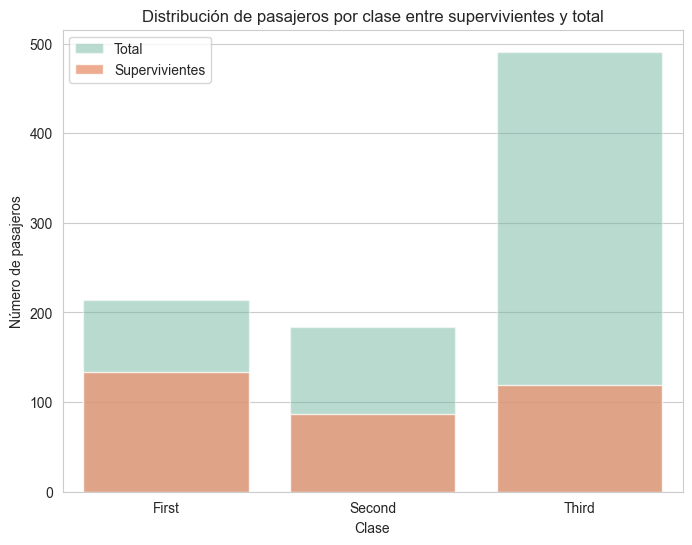

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo y los colores de Seaborn
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Obtener la frecuencia de cada clase en el total de pasajeros
frecuencia_clase_total = df_titanic_copia['class'].value_counts().sort_index()

# Obtener la frecuencia de cada clase entre los supervivientes
frecuencia_clase_supervivientes = df_titanic_copia[df_titanic_copia['survived'] == 1]['class'].value_counts().sort_index()

# Crear el gráfico de barras usando Seaborn
plt.figure(figsize=(8, 6))

# Graficar la distribución total de pasajeros por clase
sns.barplot(x=frecuencia_clase_total.index, y=frecuencia_clase_total.values, alpha=0.5, label='Total')

# Graficar la distribución de pasajeros por clase entre los supervivientes
sns.barplot(x=frecuencia_clase_supervivientes.index, y=frecuencia_clase_supervivientes.values, alpha=0.8, label='Supervivientes')

# Etiquetas de los ejes y título
plt.xlabel('Clase')
plt.ylabel('Número de pasajeros')
plt.title('Distribución de pasajeros por clase entre supervivientes y total')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


### embarked:

**Valores:**
- C: Cherbourg.
- Q: Queenstown.
- S: Southampton.

**Gráfica:** 
Gráfico de barras de la distribución de pasajeros por puerto de embarque, supervivientes vs total.

**Conclusiones/observaciones:**
- La mayoría de los pasajeros y víctimas embarcaron en Southampton.
- Cherbourg y Queenstown tienen una cantidad significativamente menor de pasajeros y mayor de supervivientes, especialmente Cherbourg.


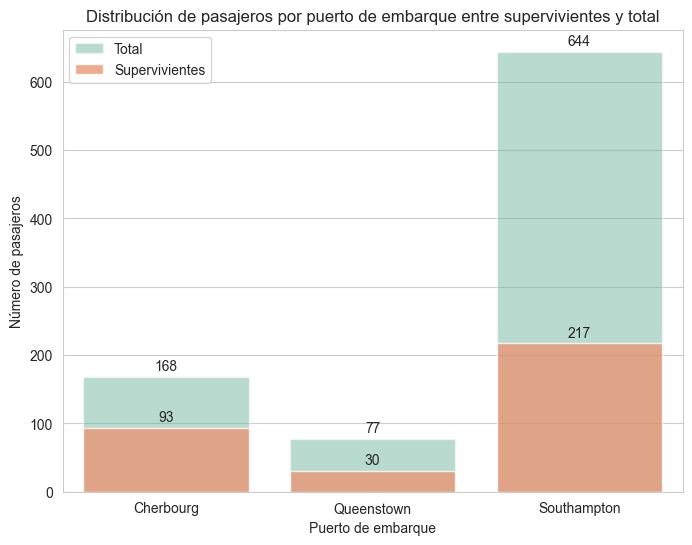

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo y los colores de Seaborn
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Obtener la frecuencia de cada puerto de embarque en el total de pasajeros
frecuencia_embarked_total = df_titanic_copia['embarked'].value_counts().sort_index()

# Obtener la frecuencia de cada puerto de embarque entre los supervivientes
frecuencia_embarked_supervivientes = df_titanic_copia[df_titanic_copia['survived'] == 1]['embarked'].value_counts().sort_index()

# Crear el gráfico de barras usando Seaborn
plt.figure(figsize=(8, 6))

# Graficar la distribución total de pasajeros por puerto de embarque
sns.barplot(x=frecuencia_embarked_total.index, y=frecuencia_embarked_total.values, alpha=0.5, label='Total')

# Agregar etiquetas a las barras del total de pasajeros
for index, value in enumerate(frecuencia_embarked_total.values):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

# Graficar la distribución de pasajeros por puerto de embarque entre los supervivientes
sns.barplot(x=frecuencia_embarked_supervivientes.index, y=frecuencia_embarked_supervivientes.values, alpha=0.8, label='Supervivientes')

# Agregar etiquetas a las barras de los supervivientes
for index, value in enumerate(frecuencia_embarked_supervivientes.values):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

# Etiquetas de los ejes y título
plt.xlabel('Puerto de embarque')
plt.ylabel('Número de pasajeros')
plt.title('Distribución de pasajeros por puerto de embarque entre supervivientes y total')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


### alone:

**Valores:**
- True: Viajaba solo.
- False: Viajaba acompañado.

**Gráfica:** 
Gráfico de barras de la distribución de pasajeros que viajaban solos y acompañados.

**Conclusiones/observaciones:**
- La mayoría de los pasajeros viajaban solos y entre ellos fue el mayor número de victimas.
- Hay más supervivientes pasajeros que viajaban acompañados en comparación con los que viajaban solos.


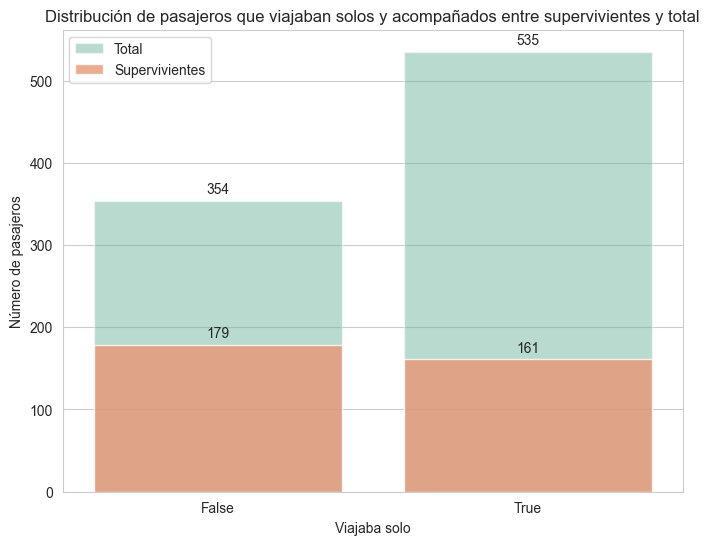

In [31]:
# Configurar el estilo y los colores de Seaborn
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Obtener la frecuencia de pasajeros que viajaban solos y acompañados en el total
frecuencia_alone_total = df_titanic_copia['alone'].value_counts().sort_index()

# Obtener la frecuencia de pasajeros que viajaban solos y acompañados entre los supervivientes
frecuencia_alone_supervivientes = df_titanic_copia[df_titanic_copia['survived'] == 1]['alone'].value_counts().sort_index()

# Crear el gráfico de barras usando Seaborn
plt.figure(figsize=(8, 6))

# Graficar la distribución total de pasajeros que viajaban solos y acompañados
sns.barplot(x=frecuencia_alone_total.index, y=frecuencia_alone_total.values, alpha=0.5, label='Total')

# Agregar etiquetas a las barras del total de pasajeros
for index, value in enumerate(frecuencia_alone_total.values):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

# Graficar la distribución de pasajeros que viajaban solos y acompañados entre los supervivientes
sns.barplot(x=frecuencia_alone_supervivientes.index, y=frecuencia_alone_supervivientes.values, alpha=0.8, label='Supervivientes')

# Agregar etiquetas a las barras de los supervivientes
for index, value in enumerate(frecuencia_alone_supervivientes.values):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

# Etiquetas de los ejes y título
plt.xlabel('Viajaba solo')
plt.ylabel('Número de pasajeros')
plt.title('Distribución de pasajeros que viajaban solos y acompañados entre supervivientes y total')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()



### #2.2 Numéricas

### age:

**Gráfica:** 
Histograma de distribución de edades, supervivivnetes vs total

**Conclusiones/observaciones:**
- La mayoría de los pasajeros tenían entre 20 y 30 años y allí hay el mayor número de victimas.
- La proporción de niños que sobrevivieron es la mayor. 
- No hubo supervivivnetes mayores de 70.


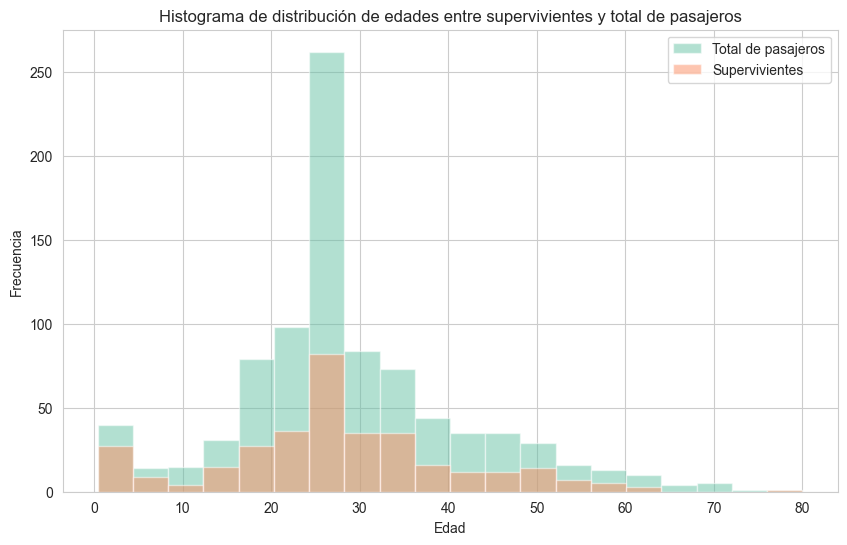

In [32]:
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Histograma de edades para el total de pasajeros
plt.hist(df_titanic_copia['age'], bins=20, alpha=0.5, label='Total de pasajeros')

# Histograma de edades para los supervivientes
plt.hist(df_titanic_copia[df_titanic_copia['survived'] == 1]['age'], bins=20, alpha=0.5, label='Supervivientes')

# Etiquetas de los ejes y título
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de distribución de edades entre supervivientes y total de pasajeros')

# Mostrar la leyenda
plt.legend()

# Mostrar el histograma
plt.show()


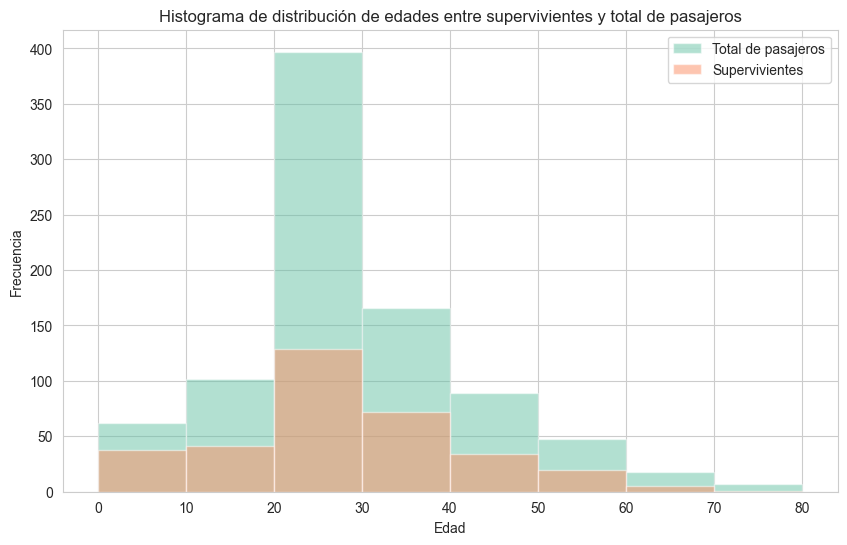

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los intervalos de los bins para grupos de 10 años
bins = np.arange(0, df_titanic_copia['age'].max() + 10, 10)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Histograma de edades para el total de pasajeros
plt.hist(df_titanic_copia['age'], bins=bins, alpha=0.5, label='Total de pasajeros')

# Histograma de edades para los supervivientes
plt.hist(df_titanic_copia[df_titanic_copia['survived'] == 1]['age'], bins=bins, alpha=0.5, label='Supervivientes')

# Etiquetas de los ejes y título
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de distribución de edades entre supervivientes y total de pasajeros')

# Mostrar la leyenda
plt.legend()

# Mostrar el histograma
plt.show()


### fare:

**Gráfica:** 
Histograma de distribución de tarifas, supervivientes vs total
Gráfico de puntos con Seaborn

**Conclusiones/observaciones:**
- La tarifa pagada por la mayoría de los pasajeros estaba en el rango más bajo.
- Parece que a mayor tárifa pagada mayor probabilidad de supervivencia.


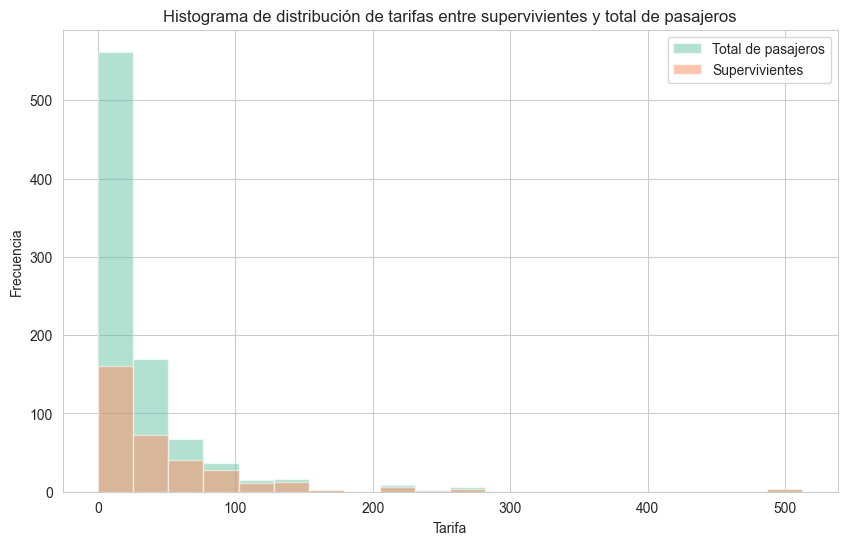

In [35]:
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Histograma de tarifas para el total de pasajeros
plt.hist(df_titanic_copia['fare'], bins=20, alpha=0.5, label='Total de pasajeros')

# Histograma de tarifas para los supervivientes
plt.hist(df_titanic_copia[df_titanic_copia['survived'] == 1]['fare'], bins=20, alpha=0.5, label='Supervivientes')

# Etiquetas de los ejes y título
plt.xlabel('Tarifa')
plt.ylabel('Frecuencia')
plt.title('Histograma de distribución de tarifas entre supervivientes y total de pasajeros')

# Mostrar la leyenda
plt.legend()

# Mostrar el histograma
plt.show()


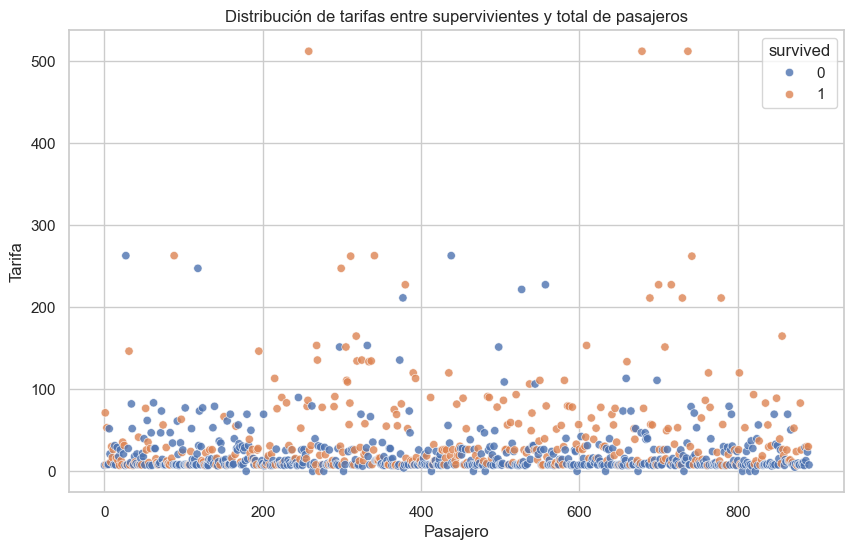

In [37]:
# Probamos grafico de puntos
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de puntos con Seaborn
sns.scatterplot(data=df_titanic_copia, x=df_titanic_copia.index, y='fare', hue='survived', alpha=0.8)

# Etiquetas de los ejes y título
plt.xlabel('Pasajero')
plt.ylabel('Tarifa')
plt.title('Distribución de tarifas entre supervivientes y total de pasajeros')

# Mostrar el gráfico
plt.show()



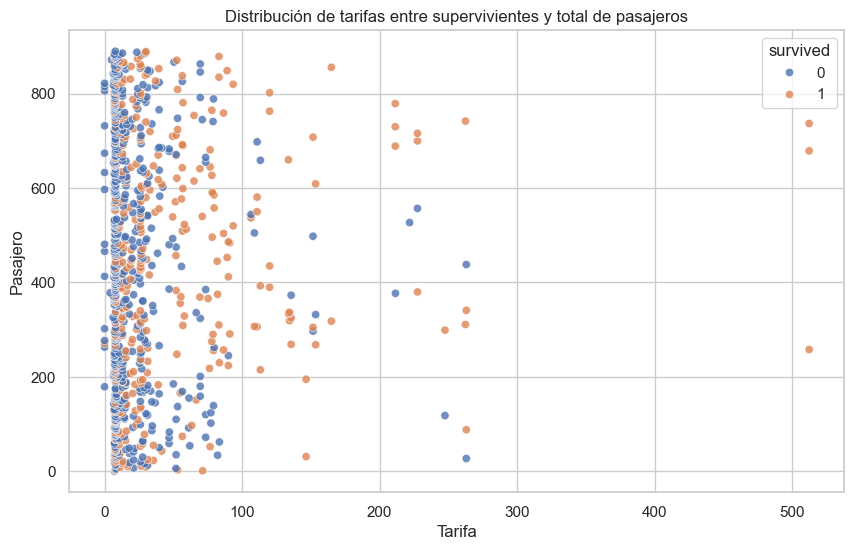

In [38]:
# Cambiamos los ejes para verlo mejor
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de puntos con Seaborn
sns.scatterplot(data=df_titanic_copia, x='fare', y=df_titanic_copia.index, hue='survived', alpha=0.8)

# Etiquetas de los ejes y título
plt.xlabel('Tarifa')
plt.ylabel('Pasajero')
plt.title('Distribución de tarifas entre supervivientes y total de pasajeros')

# Mostrar el gráfico
plt.show()
